# Diabetes prediction

In [685]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from random import randint
from sklearn.metrics import classification_report,confusion_matrix


In [686]:
def load_dataset():
    url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
    df = read_csv(url, header=None,names=['Number of times pregnant','Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
   'Diastolic blood pressure (mm Hg)','Triceps skin fold thickness (mm)','2-Hour serum insulin (mu U/ml)','Body mass index (weight in kg/(height in m)^2)',
   'Diabetes pedigree function','Age (years)','Outcome'])
    data = df.values
    
    return data[:, :-1], data[:, -1]
    

In [687]:
def load_dataset2():
    url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
    df = read_csv(url, header=None,names=['Number of times pregnant','Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
   'Diastolic blood pressure (mm Hg)','Triceps skin fold thickness (mm)','2-Hour serum insulin (mu U/ml)','Body mass index (weight in kg/(height in m)^2)',
   'Diabetes pedigree function','Age (years)','Outcome'])
    return df

In [688]:
n=load_dataset2()

In [689]:
n

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [690]:
n.columns

Index(['Number of times pregnant',
       'Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
       'Diastolic blood pressure (mm Hg)', 'Triceps skin fold thickness (mm)',
       '2-Hour serum insulin (mu U/ml)',
       'Body mass index (weight in kg/(height in m)^2)',
       'Diabetes pedigree function', 'Age (years)', 'Outcome'],
      dtype='object')

In [691]:
n[['Age (years)']]=n[['Age (years)']]+5

In [692]:
n.drop(['Outcome'], axis=1)

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years)
0,6,148,72,35,0,33.6,0.627,55
1,1,85,66,29,0,26.6,0.351,36
2,8,183,64,0,0,23.3,0.672,37
3,1,89,66,23,94,28.1,0.167,26
4,0,137,40,35,168,43.1,2.288,38
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,68
764,2,122,70,27,0,36.8,0.340,32
765,5,121,72,23,112,26.2,0.245,35
766,1,126,60,0,0,30.1,0.349,52


In [693]:
data=load_dataset()

In [694]:
data

(array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
        [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
        [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
        ...,
        [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
        [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
        [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]]),
 array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
        1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
        0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
        0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
        0., 1., 0., 0., 0., 1., 1., 0.,

In [695]:
for i in range(len(data)):
    data[0][i][7]=data[0][i][7]+5

In [696]:
data[0][0]

array([  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
        55.   ])

In [697]:
data[0][1]

array([ 1.   , 85.   , 66.   , 29.   ,  0.   , 26.6  ,  0.351, 36.   ])

# Hill Climbing Algorithm

In [698]:
# evaluate a set of predictions

def evaluate_predictions(y_test, yhat):
    return accuracy_score(y_test, yhat)

In [699]:
# create a random set of predictions

def random_predictions(n_examples):
    return [randint(0, 1) for _ in range(n_examples)]

In [638]:
# modify the current set of predictions

def modify_predictions(current, n_changes=1):
    updated = current.copy()                 # copy current solution
    for i in range(n_changes):
        ix = randint(0, len(updated)-1)      # select a point to change
        updated[ix] = 1 - updated[ix]        # flip the class label
    return updated                    

In [639]:
# run hill climb for a set of predictions

def hill_climb_testset(X_test, y_test, max_iterations):
    scores = list()
    solution = random_predictions(X_test.shape[0])             
    score = evaluate_predictions(y_test, solution)              
    scores.append(score)                                        
    
    for i in range(max_iterations):                           
        scores.append(score)                                   
        if score == 1.0:                                        
            break
        candidate = modify_predictions(solution)                
        value = evaluate_predictions(y_test, candidate)         
        if value >= score:                                      
            solution, score = candidate, value
            print('>%d, score=%.3f' % (i, score))
    return solution, scores

In [640]:
X, y = data
print(X.shape, y.shape)

(768, 8) (768,)


In [641]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  55.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  36.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [642]:
# split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [643]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(514, 8) (254, 8) (514,) (254,)


In [653]:
# run hill climb
yhat, scores = hill_climb_testset(X_test, y_test, 5000)

>1, score=0.543
>4, score=0.547
>7, score=0.551
>9, score=0.555
>11, score=0.559
>12, score=0.563
>13, score=0.567
>14, score=0.571
>15, score=0.575
>16, score=0.579
>19, score=0.583
>21, score=0.587
>22, score=0.591
>23, score=0.594
>29, score=0.598
>32, score=0.602
>33, score=0.606
>37, score=0.610
>41, score=0.614
>42, score=0.618
>45, score=0.622
>60, score=0.626
>62, score=0.630
>64, score=0.634
>70, score=0.638
>76, score=0.642
>77, score=0.646
>78, score=0.650
>79, score=0.654
>80, score=0.657
>84, score=0.661
>85, score=0.665
>87, score=0.669
>88, score=0.673
>90, score=0.677
>92, score=0.681
>98, score=0.685
>99, score=0.689
>100, score=0.693
>107, score=0.697
>108, score=0.701
>114, score=0.705
>119, score=0.709
>126, score=0.713
>133, score=0.717
>135, score=0.720
>142, score=0.724
>143, score=0.728
>146, score=0.732
>147, score=0.736
>155, score=0.740
>157, score=0.744
>158, score=0.748
>160, score=0.752
>167, score=0.756
>169, score=0.760
>173, score=0.764
>174, score=0.76

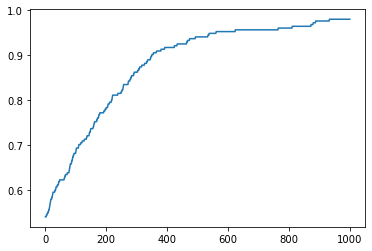

In [701]:
# plot the scores vs iterations

plt.plot(scores)
plt.show()

# KNN

In [702]:
from sklearn.neighbors import KNeighborsClassifier

In [703]:
knn=KNeighborsClassifier(n_neighbors=5)

In [704]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [705]:
print('Accuracy of on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of on training set: 0.82
Accuracy of on test set: 0.70


In [706]:
y_pred=knn.predict(X_test)
y_pred

array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [707]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[200  48]
 [ 69  67]]
              precision    recall  f1-score   support

         0.0       0.74      0.81      0.77       248
         1.0       0.58      0.49      0.53       136

    accuracy                           0.70       384
   macro avg       0.66      0.65      0.65       384
weighted avg       0.69      0.70      0.69       384



# Decision tree

In [708]:
from sklearn.tree import DecisionTreeClassifier

In [709]:
dt = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt = dt.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = dt.predict(X_test)
y_pred



array([0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1.

In [710]:
print('Accuracy of on training set: {:.2f}'.format(dt.score(X_train, y_train)))
print('Accuracy of on test set: {:.2f}'.format(dt.score(X_test, y_test)))

Accuracy of on training set: 1.00
Accuracy of on test set: 0.73


In [711]:
from sklearn import metrics

In [712]:
print("DT score:",metrics.accuracy_score(y_test, y_pred))

DT score: 0.7317708333333334


In [713]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[199  49]
 [ 54  82]]
              precision    recall  f1-score   support

         0.0       0.79      0.80      0.79       248
         1.0       0.63      0.60      0.61       136

    accuracy                           0.73       384
   macro avg       0.71      0.70      0.70       384
weighted avg       0.73      0.73      0.73       384



# Random Forest

In [714]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [715]:
#Split the data randomly into two. One for training the model, one for testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .5)

In [716]:
#Make and fit the random forest to the training data
randForest = RandomForestClassifier(n_estimators=100, random_state=0)
randForest.fit(X_train, y_train) 

RandomForestClassifier(random_state=0)

In [717]:
print("Accuracy on training set: {:.3f}".format(randForest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(randForest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.771


# Support Vector Machine

In [718]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
svc = SVC()
svc.fit(X_train_scaled, y_train)

SVC()

In [719]:
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.34
Accuracy on test set: 0.35


# Gradient Boosting


In [720]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [721]:
print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(X_test, y_test)))

Accuracy on training set: 0.956
Accuracy on test set: 0.750


# Predict on new data set (minimum 1 row).

In [722]:
data_new=pd.read_csv(r'C:\Users\ACER\Downloads\newdataset.csv')

In [723]:
data_new

,'Number of times pregnant','Plasma glucose concentration a 2 hours in an oral glucose tolerance test','Diastolic blood pressure (mm Hg)','Triceps skin fold thickness (mm)','2-Hour serum insulin (mu U/ml)','Body mass index (weight in kg/(height in m)^2)','Diabetes pedigree function','Age (years)'
0,6,148,72,35,0,33.6,0.627,55
1,1,85,66,29,0,26.6,0.351,36
2,8,183,64,0,0,23.3,0.672,37


In [724]:
knn.predict(data_new)

array([0., 0., 1.])

In [725]:
dt.predict(data_new)

array([1., 0., 0.])

In [726]:
randForest.predict(data_new)

array([1., 0., 1.])

In [727]:
gb.predict(data_new)

array([1., 0., 1.])

In [728]:
svc.predict(data_new)

array([1., 1., 1.])